In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Transform Object Data

In [5]:
la = LabelEncoder()
data.Gender=la.fit_transform(data.Gender)

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Create Model

In [35]:
st=StandardScaler()
xdata = st.fit_transform(data)

In [8]:
cluster_n=[]
j=[]

for i in range(1,12):
    model = KMeans(n_clusters=i)
    model.fit(data)
    cluster_n.append(i)
    j.append(model.inertia_)
    

C:\Users\abdel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\abdel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [9]:
pd.DataFrame(cluster_n,j)

,0
975512.060000,1
387065.713771,2
271384.508783,3
195401.198560,4
157141.339594,5
122637.557961,6
103233.097885,7
86053.674448,8
76894.301576,9
69128.028226,10


Text(0, 0.5, 'count of Erorr')

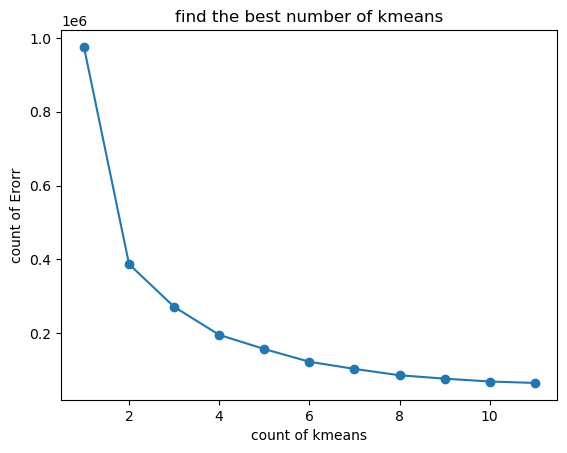

In [10]:
plt.plot(cluster_n,j ,marker ='o')
plt.title('find the best number of kmeans')
plt.xlabel('count of kmeans')
plt.ylabel('count of Erorr')

In [11]:
    model = KMeans(n_clusters=4)
    model.fit(data)
    pre = model.predict(data)


C:\Users\abdel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
data['k_mean']=pre

In [13]:
df1=data[data['k_mean']==0]
df2=data[data['k_mean']==1]
df3=data[data['k_mean']==2]
df4=data[data['k_mean']==3]

In [14]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k_mean
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,3
197,198,1,32,126,74,0
198,199,1,32,137,18,3


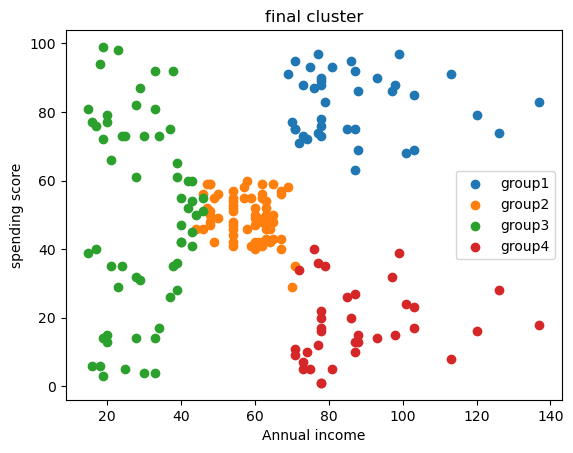

In [15]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label ='group1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label ='group2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label ='group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label ='group4')

plt.title('final cluster')
plt.xlabel('Annual income')
plt.ylabel('spending score')
plt.legend()

## Data Analysis

<Axes: xlabel='k_mean', ylabel='count'>

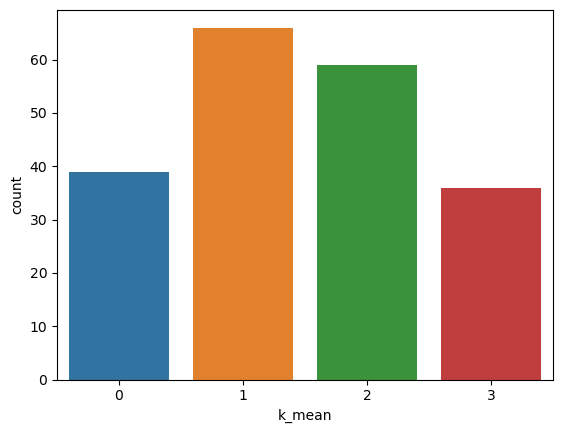

In [42]:
sns.countplot(x=data['k_mean'])

<Axes: ylabel='k_mean'>

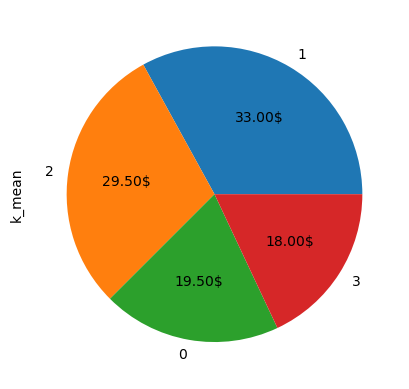

In [38]:
data['k_mean'].value_counts().plot.pie(autopct='%0.2f$')

<Axes: xlabel='k_mean', ylabel='Spending Score (1-100)'>

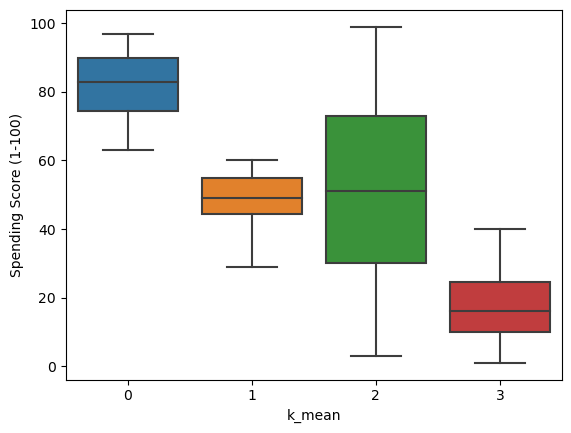

In [40]:
sns.boxplot(x=data['k_mean'],y=data['Spending Score (1-100)'])

<Axes: xlabel='Age', ylabel='Count'>

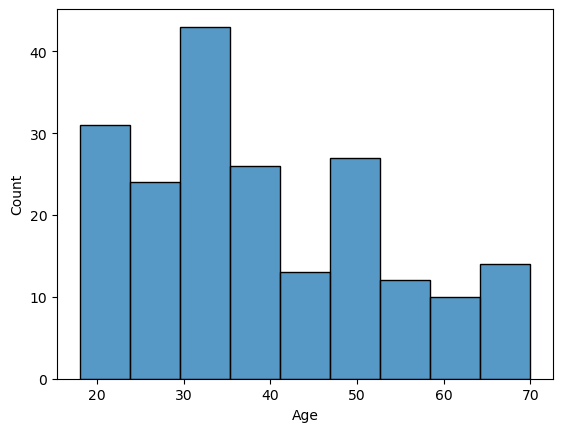

In [47]:
sns.histplot(data.Age)

<Axes: xlabel='k_mean', ylabel='count'>

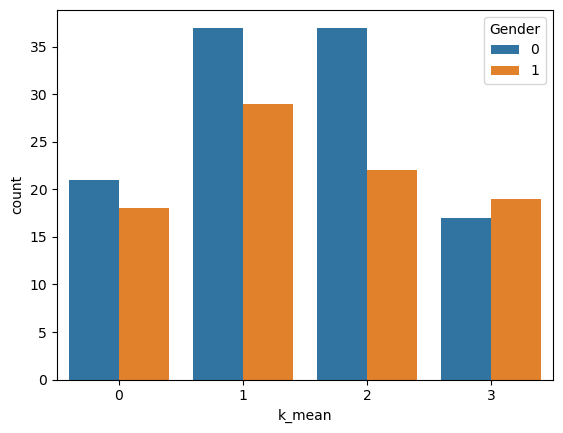

In [44]:
sns.countplot(x=data.k_mean,hue=data.Gender)

<Axes: xlabel='Gender', ylabel='count'>

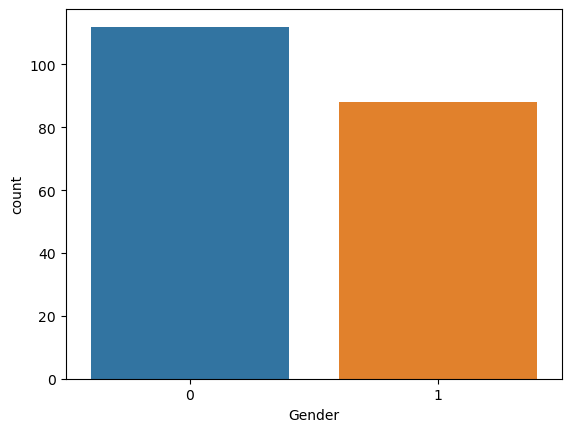

In [21]:
sns.countplot(data=data,x='Gender')